In [10]:
#%matplotlib qt
#%gui qt

%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

#%load_ext autoreload
#%autoreload 1

import lsst.afw.display as afwDisplay
import lsst.display.matplotlib

<IPython.core.display.Javascript object>


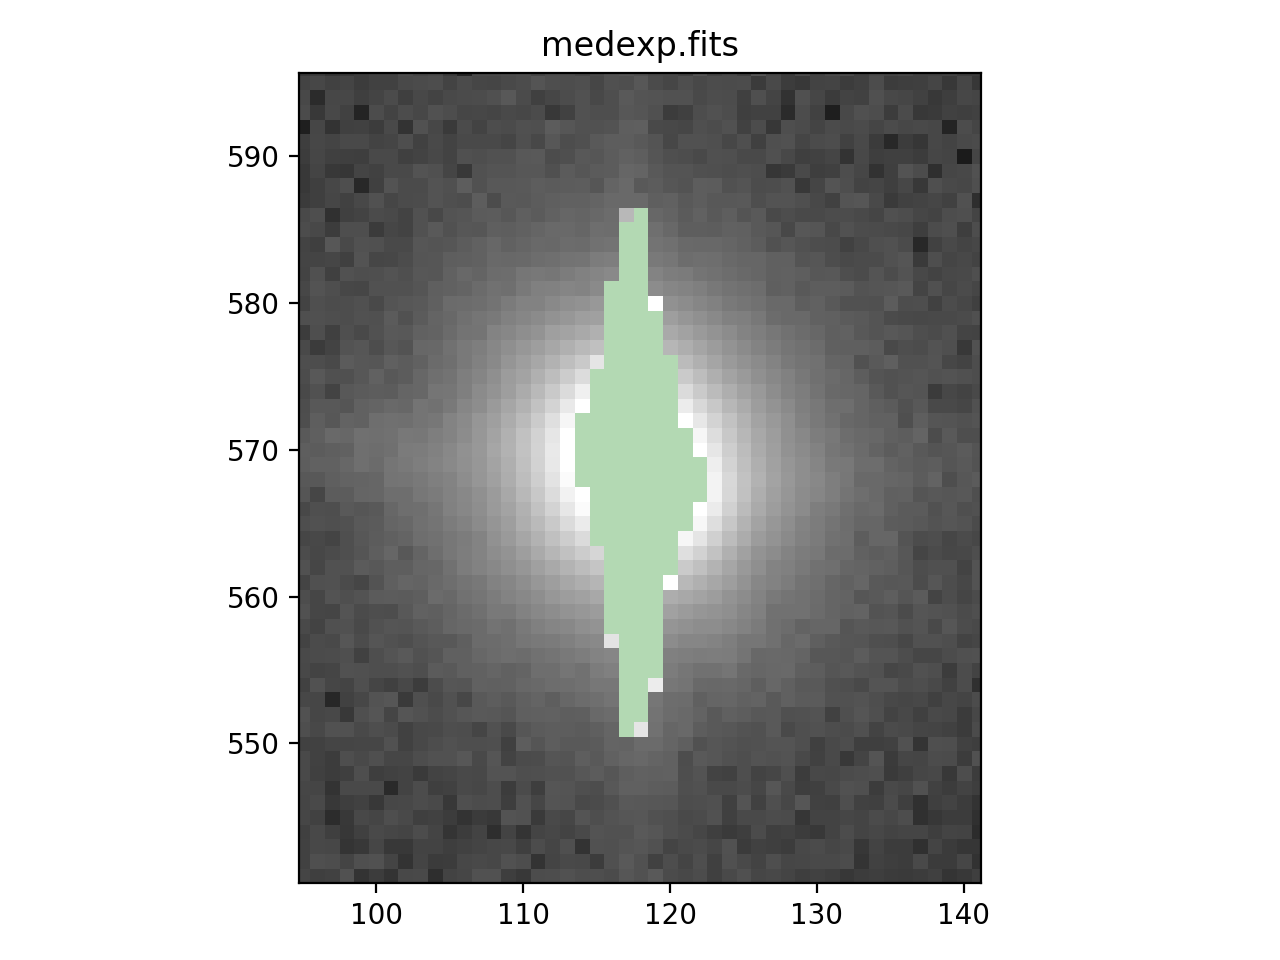

In [11]:
import lsst.afw.geom as afwGeom
import lsst.afw.image as afwImage
import lsst.afw.math as afwMath

afwDisplay.setDefaultBackend("matplotlib")
disp = afwDisplay.Display(interpretMaskBits=True,
                          mtvOrigin=afwImage.PARENT)

if False:
    im = afwImage.MaskedImageF(100, 50)
    afwMath.randomGaussianImage(im.image, afwMath.Random())
    im.setXY0(10, 5)
    im[0, 0] = 20
    im.mask[0, 0] = im.mask.getPlaneBitMask("EDGE")
    im[-1, -1] = 30
    im.image[50, 22:24] = 40
    im.mask[50, 22] = 0x5

    disp.scale(algorithm='asinh', min=0, max=2, Q=8)
    title='test'
else:
    fileName = "/Users/rhl/LSST/afwdata/data/medexp.fits"
    im = afwImage.ExposureF(fileName)
    title = os.path.split(fileName)[1]
    
    disp.scale(algorithm='asinh', min=2800, max=3200, Q=8)
    
disp.mtv(im, title=title)

In [12]:
if False:
    disp = afwDisplay.Display()
    disp.setImage(im)

if True:
    disp.scale(algorithm='asinh', min="zscale", Q=8)
else:
    disp.scale(algorithm='linear', min="zscale")
disp.mtv(im, title=title)
#disp.zoom(8, 136, 325)

#disp.show_colorbar(disp._impl._mappable)

In [13]:
disp.dot('o', 52, 23, ctype='RED')

disp.dot('hello world', 52, 23)

In [14]:
disp.pan(55, 23)
#disp.pan(*(im.getXY0() + 0.5*im.getDimensions()))
disp.dot('+', 55, 23, ctype='blue')
disp.zoom(4)

In [15]:
disp.line([(50, 20), (58, 20), (58, 26), (50, 26), (50, 20)], ctype='cyan')

In [9]:
disp.erase()

In [10]:
disp2 = afwDisplay.Display(2)

In [11]:
disp2.mtv(afwImage.ImageF(10, 20))
disp2.dot('o', 4, 5)

In [3]:
def pan(k, x, y):
    disp.pan(x, y)
    return False
disp._callbacks['a'] = pan

for i in (1, 2, 4, 8, 9):
    def zoom(k, x, y, z=16 if i == 9 else i):
        disp.zoom(z, x, y)
        return False

    disp._callbacks[str(i)] = zoom

disp.zoom(4)
disp.interact()

NotImplementedError: The nbAgg matplotlib backend doesn't support a blocking event loop